<a href="https://colab.research.google.com/github/AbdullahTheAnalyst/Portfolio_Projects/blob/main/ML_Classification_Model_Project_Flight_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aviakompaniya yo'lovchilarining qoniqishi**

**DataFrame Tarkibi:**

- Gender: yo'lovchilarning jinsi (ayol, erkak)

- Customer Type: mijoz turi (sodiq mijoz, ishonchsiz mijoz)

- Age: yo'lovchilarning haqiqiy yoshi

- Type of Travel: yo'lovchilar parvozining maqsadi (shaxsiy sayohat, biznes sayohat)

- Class: yo'lovchilar samolyotida sayohat klassi (Business, Eco, Eco Plus)

- Flight distance: Ushbu sayohatning parvoz masofasi

- Inflight wifi service: Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi (0: Tegishli emas; 1-5)

- Departure/Arrival time convenient: Ketish/Kelish vaqtining qoniqish darajasi

- Ease of Online booking: Onlayn bron qilishdan qoniqish darajasi

- Gate location: Darvoza joylashuvidan qoniqish darajasi

- Food and drink: Oziq-ovqat va ichimlikdan qoniqish darajasi

- Online boarding: Onlayn bortdan qoniqish darajasi

- Seat comfort: O'rindiqning qulayligidan qoniqish darajasi

- Inflight entertainment: Parvoz ichidagi o'yin-kulgidan qoniqish darajasi

- On-board service: Bort xizmatidan qoniqish darajasi

- Leg room service: oyoq xonasi xizmatidan qoniqish darajasi

- Baggage handling: bagajni tashishdan qoniqish darajasi

- Check-in service: Ro'yxatdan o'tish xizmatidan qoniqish darajasi

- Inflight service: Parvoz ichidagi xizmatdan qoniqish darajasi

- Cleanliness: Tozalikdan qoniqish darajasi

- Departure Delay in Minutes: jo‘nash vaqtida kechikish daqiqalari

- Arrival Delay in Minutes: yetib kelganda kechikish daqiqalari

- Satisfaction: Aviakompaniyaning qoniqish darajasi (qoniqish, neytral yoki norozilik)

# Machine Learning uchun CRISP_DM Loyiha qadamlari:

**1-QADAM : BIZNESNI (FAOLIYAT) O'RGANISH**

    1-bosqich: Jarayonni tushunish: **Текст, выделенный полужирным шрифтом**

         a. a. Buyurtmachi - "Best Fly Uzbekistan" MChJ.
            Buyurtma - DataFrame Aviakompaniya yo'lovchilarining qoniqish so'rovini o'z ichiga oladi. Yo'lovchilarning qoniqishini bashorat qila olish bo'yicha Classification Model yaratish
            Mavjud DataSet - https://www.kaggle.com/competitions/aviakompaniya/data?select=train_dataset.csv
    
         b. Buyurtmachi orqali suhbat:
            Biz yaratgan Regression Model, modelimizning chiqishi boshqa kattaroq modelning kirishiga ulanadi;
            Biz to'plagan DataSet ichidagi hozirgi qoniqish, avvalda qatnovda ishtirok etgan insonlar bo'yicha yi'g'ilgan baza hosil bo'lgan qoniqish bo'yicha;
            Mavjud usulning ya'ni Modelimiz orqali emas, balki ekspertlar chiqargan natija aniqligi qanday? 20%
    
    2-bosqich: Analitik yondashuvni aniqlash:

        a. Qaysi Machine Learning turini qo'llaymiz? - Supervised, chunki bizga Label qismi mavjud
        b. Muammoning turi (Algorithm) qanday? - Classification Model
        c. Usul? - 20 % Offline / 70 % Online
        d. Modelimiz aniqligini qanday aniqlaymiz? Classification Report hamda Accuracy Score

**2-QADAM : MA'LUMOTLARNI O'RGANISH (Exploring Data)**

    3-bosqich: Ma'lumotlarga qo'yilgan talablar

    4-bosqich: Ma'lumotlarni yig'ish
    
    5-bosqich: Ma'lumotlarni talqin qilish

In [3]:
import pandas as pd # data cleaning
import numpy as np # linear algebra
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

import sklearn # sci-kit learn for Machine Learning Models

# kerakli kutubxonalar

In [76]:
df = pd.read_csv("/content/train_dataset.csv", index_col = "id")
df.head()

# kerakli dataframe'ni yuklash

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [78]:
df["satisfaction"].value_counts()

# eng muhim Column qiymatlarini: 0 - unsatisfaction; 1 - satisfaction

,count
satisfaction,
0,5000
1,5000


In [79]:
df.shape

# dataframe o'lchami: 10000 - Rows; 23 - Columns

(10000, 23)

In [8]:
df.isnull().sum()

# faqat "Arrival Delay in Minutes" ustunida 28 null qiymat mavjud

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [81]:
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(method = "ffill")

# forward fill metodi orqali null qiymatlar to'ldirildi

<ipython-input-81-1ab1d1aeac6b>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(method = "ffill")


In [82]:
df.isnull().sum()

# yana null qiymatlar tekshirib olindi

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [83]:
df.columns

# ustunlar nomlari aniqlashtirildi

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [85]:
df.info()

# data type aniqlash va Categorical types ustunlar aniqlandi

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


In [86]:
df["Gender"].value_counts()

,count
Gender,
Female,5169
Male,4831


In [88]:
df["Gender"] = df["Gender"].replace({
    "Male" : 1,
    "Female" : 0
})

In [15]:
df["Customer Type"].value_counts()

,count
Customer Type,
Loyal Customer,8307
disloyal Customer,1693


In [90]:
df["Customer Type"] = df["Customer Type"].replace({
    "Loyal Customer" : 1,
    "disloyal Customer" : 0
})

In [17]:
df["Type of Travel"].value_counts()

,count
Type of Travel,
Business travel,7079
Personal Travel,2921


In [92]:
df["Type of Travel"] = df["Type of Travel"].replace({
    "Business travel" : 1,
    "Personal Travel" : 0
})

In [19]:
df["Class"].value_counts()

,count
Class,
Business,5048
Eco,4251
Eco Plus,701


In [94]:
df["Class"] = df["Class"].replace({
    "Business" : 0,
    "Eco" : 1,
    "Eco Plus" : 2
})

In [95]:
df.info()

# yuqoridagi o'zgartirishlar natijasida yana Data types tekshirildi

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  int64  
 1   Customer Type                      10000 non-null  int64  
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  int64  
 4   Class                              10000 non-null  int64  
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


In [96]:
df.describe()

# dataset'ning umumiy statistikasi aniqlandi

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.483100,0.830700,39.375100,0.707900,0.565300,1229.556200,2.780200,3.065100,2.797800,2.981000,...,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.716700,0.500000
std,0.499739,0.375035,14.897959,0.454751,0.621268,1022.281958,1.362745,1.527316,1.421168,1.283278,...,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.018131,0.500025
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,0.000000,421.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,40.000000,1.000000,0.000000,863.500000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,1.000000,1.000000,51.000000,1.000000,1.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,1.000000,1.000000,80.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


## **Data Visualization with Correlation**

<ipython-input-97-8255573639d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.to_frame()[0], y=corr.to_frame().index, palette='Blues_r')


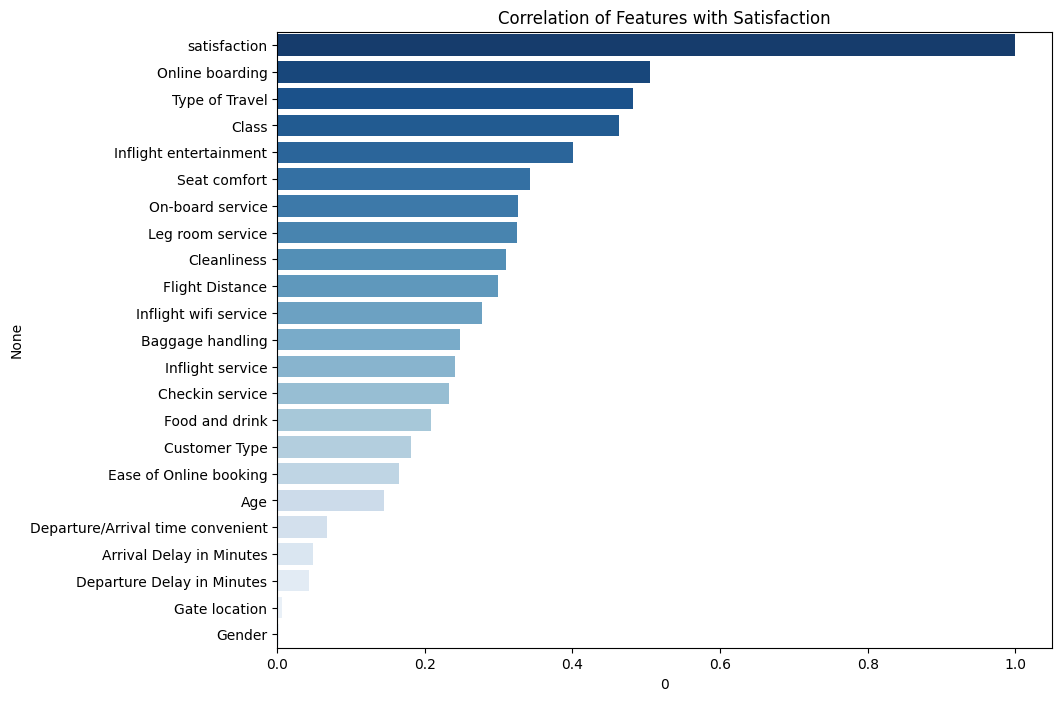

In [97]:
corr = df.corrwith(df['satisfaction'], numeric_only=True).abs().sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=corr.to_frame()[0], y=corr.to_frame().index, palette='Blues_r')
plt.title('Correlation of Features with Satisfaction')
plt.show()

# "Satisfaction" ustuni bilan yuqori Correlation bo'lgan ustunlar aniqlandi

In [98]:
not_corr_columns = ["On-board service", "Leg room service", "Cleanliness", "Flight Distance", "Inflight wifi service",
                    "Baggage handling", "Inflight service", "Checkin service", "Food and drink", "Customer Type",
                    "Ease of Online booking", "Age", "Departure/Arrival time convenient", "Arrival Delay in Minutes",
                    "Departure Delay in Minutes", "Gate location", "Gender"]

df = df.drop(not_corr_columns, axis = 1)

# Correlation juda past bo'lganlar .drop qilindi

In [101]:
print(f"Keraksiz ustunlar soni: {len(not_corr_columns)} ta")
print(f"Kerakli ustunlar soni: {len(df.columns)} ta")
print(f"Jami ustunlar soni: {len(not_corr_columns) + len(df.columns)} ta")

Keraksiz ustunlar soni: 17 ta
Kerakli ustunlar soni: 6 ta
Jami ustunlar soni: 23 ta


In [103]:
correlation = df.select_dtypes(include = "number").corr().sort_values(by = "satisfaction")
corr_satisfaction = correlation["satisfaction"].sort_values(ascending = False)
corr_satisfaction

# faqat "satisfaction" ustuni uchun eng katta bog'liq bo'lgan ustunlar

,satisfaction
satisfaction,1.000000
Online boarding,0.504986
Type of Travel,0.482266
Inflight entertainment,0.400900
Seat comfort,0.342294
Class,-0.463430


<ipython-input-104-114bcfeec1d8>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(data = df, x = "satisfaction", hue = "Online boarding", color = "blue")


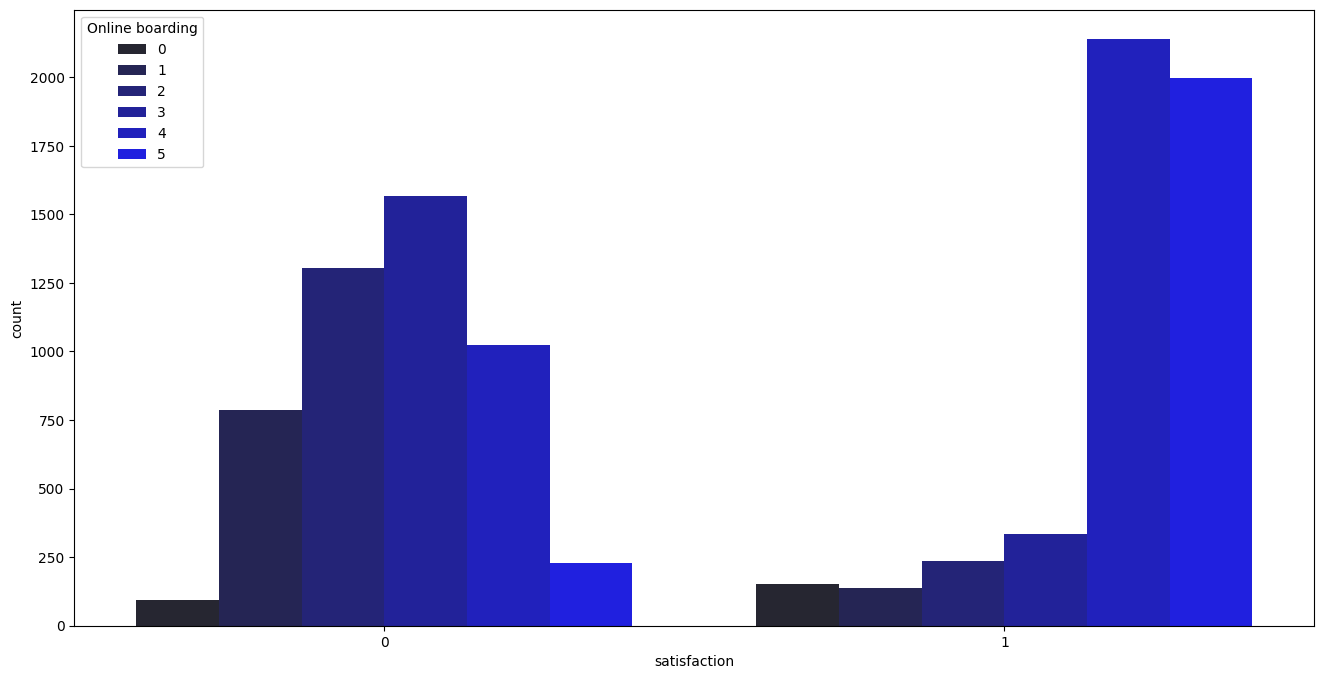

In [104]:
plt.figure(figsize = (16, 8))
sns.countplot(data = df, x = "satisfaction", hue = "Online boarding", color = "blue")
plt.show()

# Aviaqatnovdan Qoniqish yoki qoniqmaslik, Online boarding - qoniqishni 5 shkalada baholangan

<ipython-input-106-0969de71a4cf>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(data = df, x = "satisfaction", hue = "Type of Travel", color = "red")


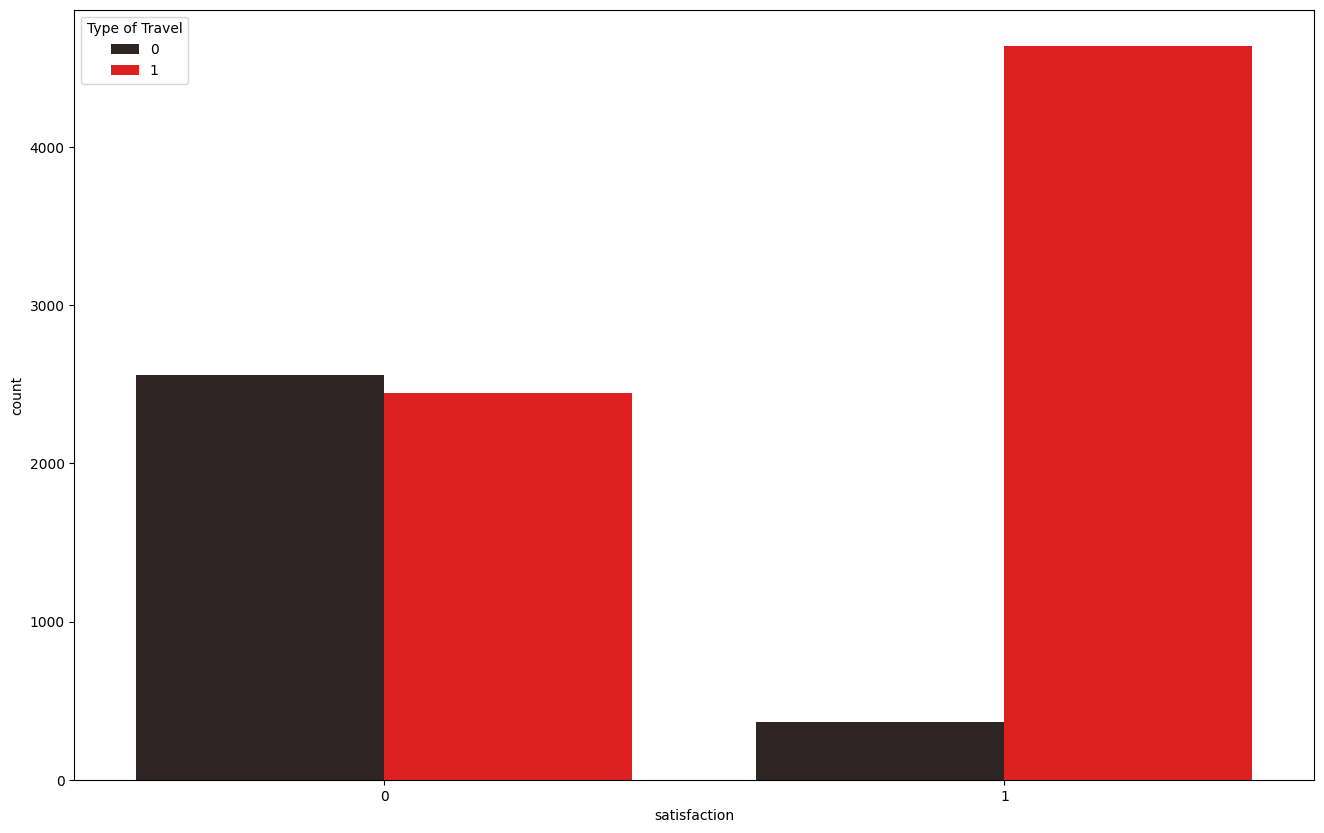

In [106]:
plt.figure(figsize = (16, 10))
sns.countplot(data = df, x = "satisfaction", hue = "Type of Travel", color = "red")
plt.show()

# Aviaqatnovdan Qoniqish yoki qoniqmaslik, Type of Travel orqali tahlil qilingan
# demak, business travelda Qoniqish ancha yuqori ekan, Personal'ga nisbatan

In [102]:
df.head()

# dataset'ning eng kerakli qismi qoldi va bu Mashine Learning processing uchun tayyor

,Type of Travel,Class,Online boarding,Seat comfort,Inflight entertainment,satisfaction
id,,,,,,
1,1,1,2,4,4,0
2,1,0,5,4,5,1
3,1,1,4,3,1,0
4,1,0,2,2,2,1
5,0,1,3,4,4,0


**3-QADAM: MA'LUMOTLARNI TAYYORLASH**

Ma'lumotlarni ajratib olish (X-parametrlar) va Labellash (Y label)

In [107]:
X = df.drop("satisfaction", axis = 1)
y = df["satisfaction"]

print(f"Parametr yoki Input qismi: {X}")
print(f"Label qismi: {y}")

# dataset X-parametr va y-label ajratildi

Parametr yoki Input qismi:        Type of Travel  Class  Online boarding  Seat comfort  \
id                                                            
1                   1      1                2             4   
2                   1      0                5             4   
3                   1      1                4             3   
4                   1      0                2             2   
5                   0      1                3             4   
...               ...    ...              ...           ...   
9996                0      1                5             4   
9997                1      2                3             3   
9998                1      0                4             5   
9999                1      0                4             5   
10000               1      0                3             5   

       Inflight entertainment  
id                             
1                           4  
2                           5  
3                        

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 12)

# train va test uchun ajratildi

In [109]:
print(
    f"Umumiy Parametr hajmi: {X.shape}\n"
    )
print(
    f"Umumiy  Label hajmi: {y.shape}\n"
    )
print(
    f"X-parametrlar uchun\n"
        f"Train set o'lchovi: {X_train.shape} va\n"
        f"Test set o'lchovi: {X_test.shape}\n"
    )
print(
    f"y-Label uchun\n"
        f"Train set o'lchovi: {y_train.shape} va\n"
        f"Test set o'lchovi: {y_test.shape}\n"
    )

Umumiy Parametr hajmi: (10000, 5)

Umumiy  Label hajmi: (10000,)

X-parametrlar uchun
Train set o'lchovi: (9000, 5) va
Test set o'lchovi: (1000, 5)

y-Label uchun
Train set o'lchovi: (9000,) va
Test set o'lchovi: (1000,)



**4-QADAM: MODELLASH**

In [110]:
from sklearn.svm import SVC

classifier_model = SVC(kernel = "linear")

classifier_model.fit(X_train, y_train)

# Supervised Machine Learning Classification Model

SVC(kernel='linear')

Evaulation

In [111]:
y_prediction = classifier_model.predict(X_test)

In [112]:
y_test.head()

,satisfaction
id,
5670,0
8801,0
3206,0
8732,1
6413,1


In [113]:
print(y_test.shape, y_prediction.shape)

(1000,) (1000,)


**5-QADAM: MODELNI BAHOLASH**

In [115]:
from sklearn.metrics import accuracy_score

test_data_accuracy = accuracy_score(y_test, y_prediction)

print(f"Accuracy score of the training data: {test_data_accuracy * 100}% aniqlikda bashorat qilyapti")

# modelimizni accuracy score orqali tekshirish

Accuracy score of the training data: 86.0% aniqlikda bashorat qilyapti


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       486
           1       0.88      0.84      0.86       514

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000

Model aniqligi: 0.86


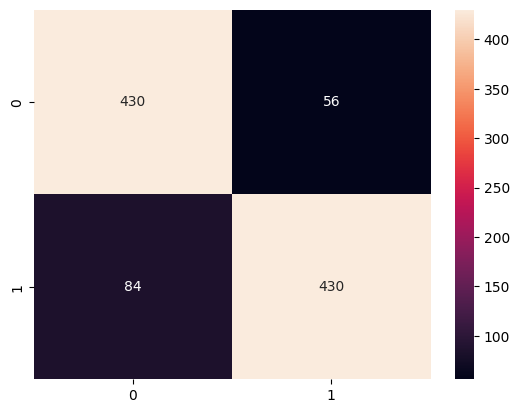

In [117]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_prediction))
print("Model aniqligi:", metrics.accuracy_score(y_test, y_prediction))

conf_mat = metrics.confusion_matrix(y_test, y_prediction)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

In [116]:
asl_vs_bashorat = pd.DataFrame({
    "Asl natija" : y_test,
    "Bashorat natija" : prediction_test
    })

asl_vs_bashorat.head(10)

,Asl natija,Bashorat natija
id,,
5670,0,0
8801,0,0
3206,0,0
8732,1,0
6413,1,0
6829,1,1
5796,1,0
9618,1,1
4644,1,1


In [118]:
asl_vs_bashorat.to_csv("classification_model.csv", index = False)

# CSV faylga saqlash